<a href="https://colab.research.google.com/github/kujoki/Advanced-Machine-Learning-Masters-2022-/blob/main/mushroom_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.model_selection import GridSearchCV

In [28]:
import numpy as np

In [34]:
from sklearn.metrics import confusion_matrix

In [36]:
from sklearn.metrics import plot_confusion_matrix

In [4]:
data = pd.read_csv('/content/sample_data/training_mush.csv')

In [6]:
data.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [7]:
X = data[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]

In [8]:
y = data['class']

In [10]:
params = {'n_estimators': range(10,50,10), 
'max_depth': range(1,12,2),
'min_samples_leaf': range(1,7),
'min_samples_split': range(2,9,2)}

In [11]:
clf = RandomForestClassifier()

In [13]:
grid_search = GridSearchCV(clf, params, cv = 3)

In [14]:
grid_search.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [16]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [17]:
clf_best = grid_search.best_estimator_

In [18]:
clf_best.feature_importances_

array([0.00360569, 0.0076559 , 0.00990499, 0.00862902, 0.16380483,
       0.        , 0.01121797, 0.14043497, 0.13180137, 0.03786044,
       0.05948432, 0.05490217, 0.04449407, 0.00250889, 0.00269639,
       0.        , 0.00029403, 0.01420877, 0.09768894, 0.11510357,
       0.03878161, 0.05492205])

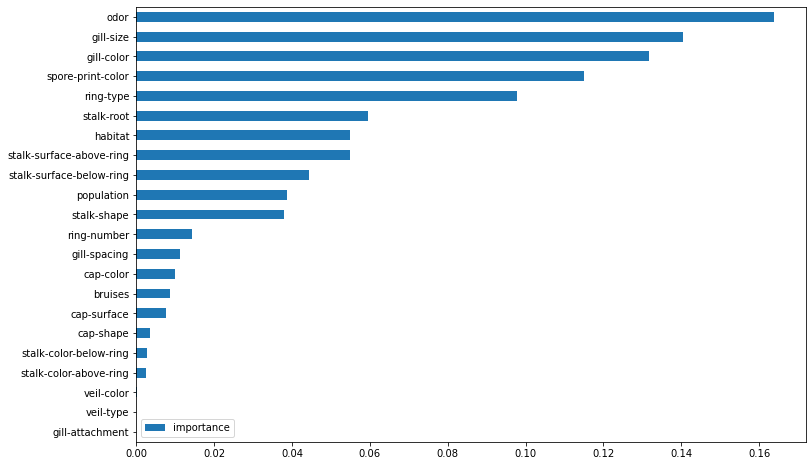

In [20]:
imp = pd.DataFrame(clf_best.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))


In [21]:
test_data = pd.read_csv('/content/sample_data/testing_mush.csv')

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2031 entries, 0 to 2030
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 2031 non-null   int64
 1   cap-surface               2031 non-null   int64
 2   cap-color                 2031 non-null   int64
 3   bruises                   2031 non-null   int64
 4   odor                      2031 non-null   int64
 5   gill-attachment           2031 non-null   int64
 6   gill-spacing              2031 non-null   int64
 7   gill-size                 2031 non-null   int64
 8   gill-color                2031 non-null   int64
 9   stalk-shape               2031 non-null   int64
 10  stalk-root                2031 non-null   int64
 11  stalk-surface-above-ring  2031 non-null   int64
 12  stalk-surface-below-ring  2031 non-null   int64
 13  stalk-color-above-ring    2031 non-null   int64
 14  stalk-color-below-ring    2031 non-null 

In [23]:
y_test = clf_best.predict(test_data)

In [29]:
values, counts = np.unique(y_test, return_counts=True)

In [30]:
values

array([0, 1])

In [31]:
counts

array([1055,  976])

In [32]:
y_true = pd.read_csv('/content/sample_data/testing_y_mush.csv')

In [33]:
y_true

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


In [35]:
confusion_matrix(y_true,y_test)


array([[1055,    0],
       [   0,  976]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


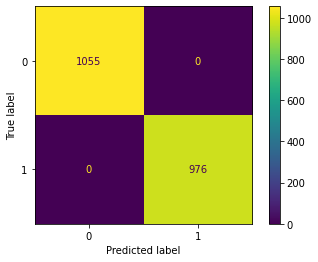

In [37]:
plot_confusion_matrix(clf_best, test_data, y_true)